In [6]:
#Install yfinance and other packages
!pip install yfinance plotly beautifulsoup4 pandas


In [14]:
# Extract Tesla stock data

import yfinance as yf
tesla_data = yf.Ticker("TSLA")
tesla_df = tesla_data.history(period="max")
tesla_df.reset_index(inplace=True)


In [24]:
tesla_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [25]:
tesla_df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
3773,2025-06-30 00:00:00-04:00,319.899994,325.579987,316.600006,317.660004,76695100,0.0,0.0
3774,2025-07-01 00:00:00-04:00,298.459991,305.890015,293.209991,300.709991,145085700,0.0,0.0
3775,2025-07-02 00:00:00-04:00,312.630005,316.829987,303.820007,315.649994,119483700,0.0,0.0
3776,2025-07-03 00:00:00-04:00,317.989990,318.450012,312.760010,315.350006,58042300,0.0,0.0
3777,2025-07-07 00:00:00-04:00,291.369995,296.149994,288.769989,293.940002,130514200,0.0,0.0


In [15]:
# Scrape Tesla revenue (if web scraping works)abs

import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue and revenue != "Revenue":
            tesla_revenue = tesla_revenue.append(
                {"Date": date, "Revenue": int(revenue)}, ignore_index=True
            )

tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_revenue = tesla_revenue.sort_values("Date")


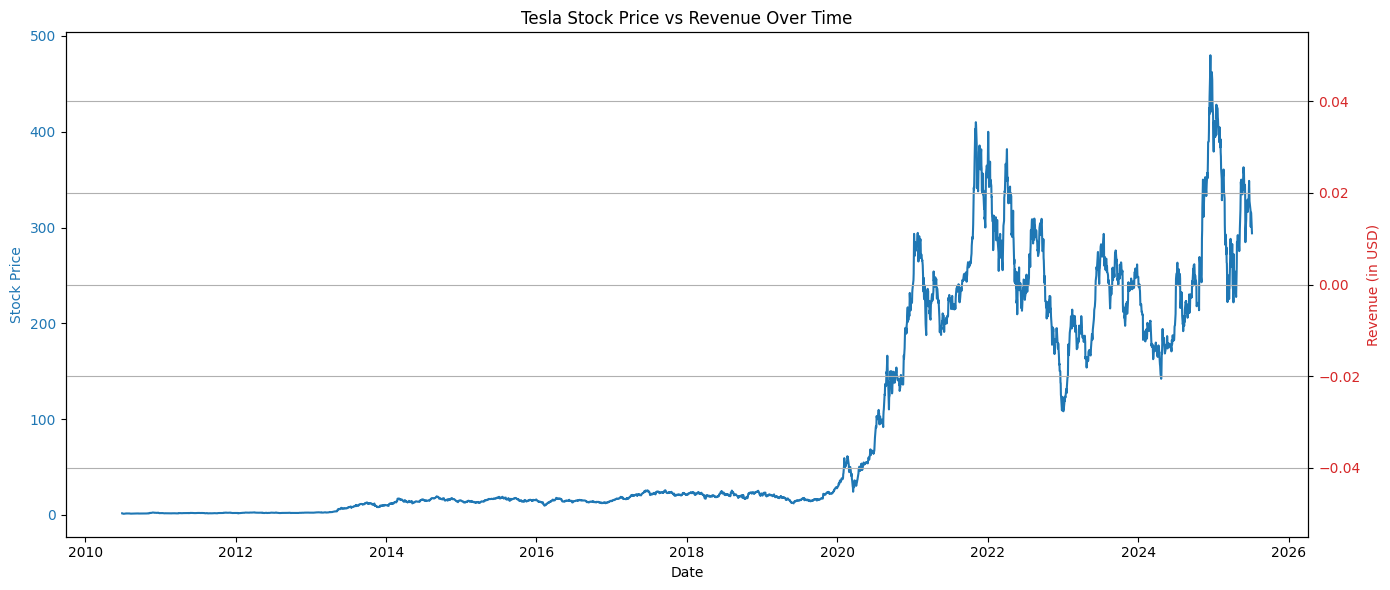

In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Function to make the dual-axis graph
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], label="Stock Price", color='tab:blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label="Revenue", color='tab:red')
    ax2.set_ylabel("Revenue (in USD)", color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(title)
    plt.grid()
    fig.tight_layout()
    plt.show()

# Function to scrape, process, and plot Tesla data
def process_and_plot_tesla_data():
    # Step 1: Get Tesla stock data using yfinance
    tesla = yf.Ticker("TSLA")
    tesla_data = tesla.history(period="max").reset_index()
    tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])

    # Step 2: Scrape Tesla revenue from Macrotrends
    url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
    html_data = requests.get(url).text
    soup = BeautifulSoup(html_data, "html.parser")

    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])
    for row in soup.find_all("tr"):
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace("$", "").replace(",", "")
            if revenue and revenue != "Revenue":
                tesla_revenue = tesla_revenue.append(
                    {"Date": date, "Revenue": int(revenue)}, ignore_index=True
                )

    tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
    tesla_revenue = tesla_revenue.sort_values("Date")

    # Step 3: Plot the graph
    make_graph(tesla_data, tesla_revenue, 'TSLA', 'Tesla Stock Price vs Revenue Over Time')

# Run the function
process_and_plot_tesla_data()



In [16]:
"""tesla_revenue = pd.read_csv("Tesla_Revenue.csv")
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace('[\$,]', '', regex=True).astype(float)
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
tesla_revenue = tesla_revenue.sort_values("Date")
"""
#IF it fails we can do it manully

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\A\AppData\Local\Temp\ipykernel_11996\2337998614.py:1: SyntaxWarning: invalid escape sequence '\$'
  """tesla_revenue = pd.read_csv("Tesla_Revenue.csv")


'tesla_revenue = pd.read_csv("Tesla_Revenue.csv")\ntesla_revenue[\'Revenue\'] = tesla_revenue[\'Revenue\'].replace(\'[\\$,]\', \'\', regex=True).astype(float)\ntesla_revenue[\'Date\'] = pd.to_datetime(tesla_revenue[\'Date\'])\ntesla_revenue = tesla_revenue.sort_values("Date")\n'

In [20]:
#Extract GameStop stock data

gme_data = yf.Ticker("GME")
gme_df = gme_data.history(period="max")
gme_df.reset_index(inplace=True)

gme_df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578048,1.607505,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0
...,...,...,...,...,...,...,...,...
5881,2025-06-30 00:00:00-04:00,23.639999,24.400000,23.540001,24.389999,10439300,0.0,0.0
5882,2025-07-01 00:00:00-04:00,24.150000,24.500000,23.680000,23.680000,8308000,0.0,0.0
5883,2025-07-02 00:00:00-04:00,23.900000,24.100000,23.750000,23.950001,6428600,0.0,0.0
5884,2025-07-03 00:00:00-04:00,23.850000,24.160000,23.490000,23.590000,5566300,0.0,0.0


In [21]:
import yfinance as yf

# Load GME data
gme = yf.Ticker("GME")

# Get stock history (price over time)
gme_history = gme.history(period="max")
print(gme_history.head())

# Get financials (income statement)
income_statement = gme.financials
print(income_statement)

# Get quarterly financials
quarterly_financials = gme.quarterly_financials
print(quarterly_financials)


                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  
                                                      2025-01-31  \
Tax Eff

In [23]:
import requests
import pandas as pd

# Replace this with your actual API key
api_key = "YOUR_API_KEY"
url = f"https://financialmodelingprep.com/api/v3/income-statement/GME?limit=40&apikey={api_key}"

response = requests.get(url)
data = response.json()

# Check if data is valid
if isinstance(data, list) and len(data) > 0:
    df = pd.DataFrame(data)
    # Sometimes the column is 'revenue' or 'revenue' in lowercase
    if 'revenue' in df.columns:
        df['date'] = pd.to_datetime(df['date'])
        df = df[['date', 'revenue']].rename(columns={'date': 'Date', 'revenue': 'Revenue'})
        df = df.sort_values('Date')
        print(df.head())
    else:
        print("Revenue column not found in data.")
else:
    print("Invalid API response or no data received:")
    print(data)


Invalid API response or no data received:
{'Error Message': 'Invalid API KEY. Feel free to create a Free API Key or visit https://site.financialmodelingprep.com/faqs?search=why-is-my-api-key-invalid for more information.'}


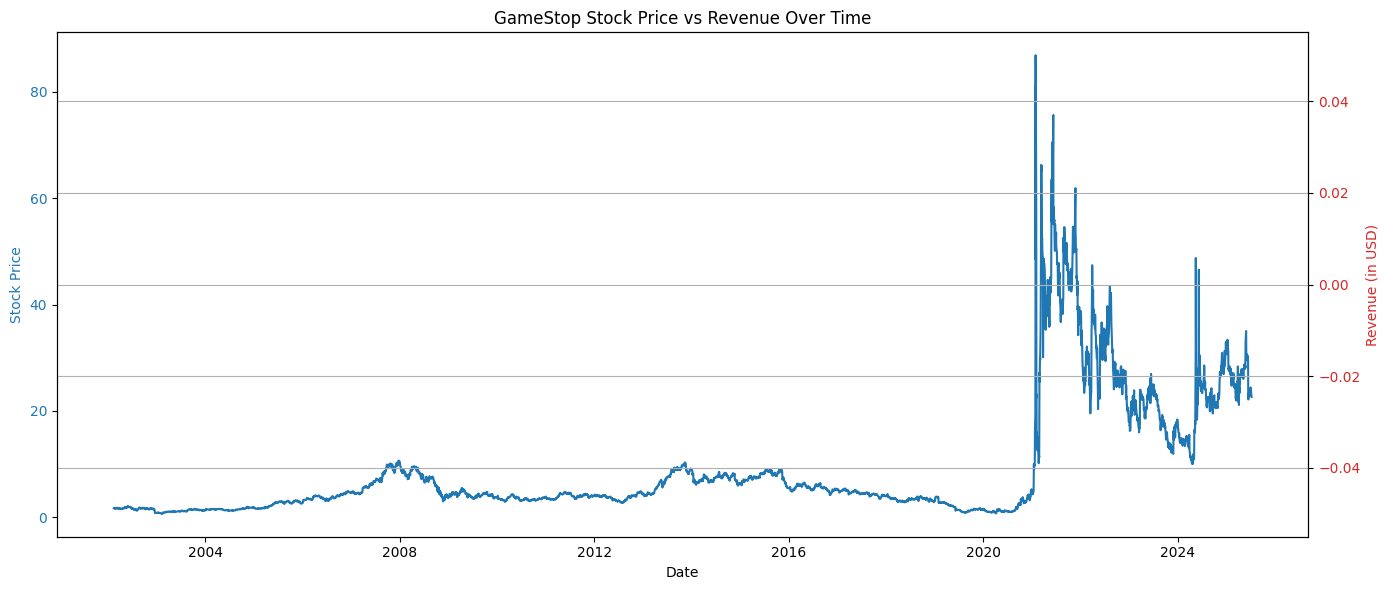

In [29]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Function to plot the graph
def make_graph(stock_data, revenue_data, stock, title):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], label="Stock Price", color='tab:blue')
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price", color='tab:blue')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], label="Revenue", color='tab:red')
    ax2.set_ylabel("Revenue (in USD)", color='tab:red')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    plt.title(title)
    plt.grid()
    fig.tight_layout()
    plt.show()

# Get GameStop stock data
gme = yf.Ticker("GME")
gme_data = gme.history(period="max").reset_index()
gme_data['Date'] = pd.to_datetime(gme_data['Date'])

# Scrape GME revenue data from Macrotrends
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
for row in soup.find_all("tr"):
    cols = row.find_all("td")
    if len(cols) == 2:
        date = cols[0].text.strip()
        revenue = cols[1].text.strip().replace("$", "").replace(",", "")
        if revenue and revenue != "Revenue":
            gme_revenue = gme_revenue.append(
                {"Date": date, "Revenue": int(revenue)}, ignore_index=True
            )

# Clean and sort the revenue data
gme_revenue["Date"] = pd.to_datetime(gme_revenue["Date"])
gme_revenue = gme_revenue.sort_values("Date")

# Plot the GameStop stock vs revenue graph
make_graph(gme_data, gme_revenue, 'GME', 'GameStop Stock Price vs Revenue Over Time')
